# 2. Multivariate Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from GradientDescent import BatchGD

### 1. Read the excel file using pandas and perform data cleaning. Remove 1st column ’id’ which may not be necessary here. Perform mean normalization of features.

In [2]:
# Reading the file prob2data.csv using pandas 
house_price  = pd.read_csv("data/prob2data.csv")
house_price.head()

,id,price,bedrooms,bathrooms,sqft_living,floors,yr_built
0,7129300520,221900.0,3,1.00,1180,1.0,1955
1,6414100192,538000.0,3,2.25,2570,2.0,1951
2,5631500400,180000.0,2,1.00,770,1.0,1933
3,2487200875,604000.0,4,3.00,1960,1.0,1965
4,1954400510,510000.0,3,2.00,1680,1.0,1987


In [3]:
# Removing the first column="id" , doing it inplace=True
house_price.drop(columns="id",inplace=True)
house_price.head()

,price,bedrooms,bathrooms,sqft_living,floors,yr_built
0,221900.0,3,1.00,1180,1.0,1955
1,538000.0,3,2.25,2570,2.0,1951
2,180000.0,2,1.00,770,1.0,1933
3,604000.0,4,3.00,1960,1.0,1965
4,510000.0,3,2.00,1680,1.0,1987


**Mean Normalization**

Mean normalization is a technique to standardize the range of independent variables or features of data. In data processing, it is also known as **feature scaling**. In this technique, we subtract the mean and then divide the resultant by the standard deviation of each value of the column.

**Formula**

$$x_{i} = \frac{x_{i} - \mu}{\\max(x_i) - min(x_i)}$$

where,

$x_{i}$ = ith value of the column

$\mu$ = mean of the column


- Separating the X and Y variables 

In [4]:
X = house_price.drop(columns="price")
y = house_price["price"]

X_pred = { 'bedrooms':4, 'bathrooms':2.5, 'sqft_living':2570, 'floors':2, 'yr_built':2005 }


- Mean Normalization

In [5]:
for col in X.columns:

    X_pred[col] = (X_pred[col] - np.mean(X[col]))/( np.max(X[col]) - np.min(X[col]) )

    X[col] = (X[col] - np.mean(X[col]))/( np.max(X[col]) - np.min(X[col]) )

    

- To check the model's performance we will split the data into train and test sets

In [8]:
# Split randomly into 80-20 train-test 

shuffled_indices = np.random.permutation(X.shape[0])

train_indices = shuffled_indices[:int(0.8*X.shape[0])]
test_indices = shuffled_indices[int(0.8*X.shape[0]):]

X_train = X.iloc[train_indices]
y_train = y.iloc[train_indices]

X_test = X.iloc[test_indices]
y_test = y.iloc[test_indices]


In [131]:
np.random.seed(42)
batch_gd = BatchGD(alpha=0.1, max_iter=30000, bias=True , tol=1e-6)

In [132]:
batch_gd.fit(X_train,y_train)

In [133]:
batch_gd.weights

array([  540034.3085905 , -1172370.13561549,   528101.90245346,
        3671953.7990554 ,   145020.96347752,  -377691.26502267])

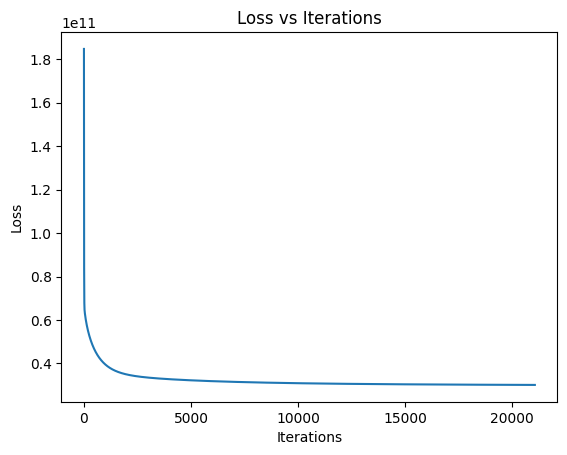

<Figure size 640x480 with 0 Axes>

In [137]:
plt.plot(batch_gd.loss_history)
plt.title("Loss vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()
plt.savefig("figures/0201.png")

- In the above plot we can see that Loss is smoothly decreasing with the iterations and finally it converges to a value.

- Let's check the RMSE of the model

In [135]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

y_test_pred = batch_gd.predict(X_test)

y_train_pred = batch_gd.predict(X_train)

rmse(y_train, y_train_pred), rmse(y_test, y_test_pred)

(245464.0211025394, 249137.81858039447)

### 3. Predict the house price using the model, for 4 bedrooms, 2.5 bathrooms, 2570 sq. feet area, 2 floors, 2005 yr. built, and state the difference between the model prediction and actual value (Rs. 719000). Show in % error

In [6]:
X_pred = np.array(list(X_pred.values()))
X_pred

array([0.01906541, 0.04815533, 0.0369887 , 0.20227641, 0.29560751])

In [103]:
pred_price = batch_gd.predict(X_pred)
actual_price = 719000

In [104]:
pred_price

array([600677.57678534])

In [105]:
# % error 
((actual_price - pred_price)/actual_price)*100

array([16.45652618])

- Hence error is 16.45%

***

***